# 미니 프로젝트 목차
1. 데이터 연결하기
2. ARIMA 실습해보기!
3. 데이터 확인하기
4. 분산을 일정하게 만들기 - log transformation
5. 차분을 통해 분석하기
6. Auto ARIMA 적용 및 결과 확인
7. ARCH 모델 실습해보기

# 데이터 로드 및 확인

In [1]:
pwd


'/Users/kenny/데싸4기/Project/Mini_Project/Finance_Timeseries'

In [2]:
ls

AirPassengers.csv         ARIMA, ARCH 실습.ipynb


In [3]:
# !pip install arch==6.3.0 

> 커널 재시작시 불필요한 코드 주석처리

In [4]:
# !pip install pmdarima

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # acf plot 및 pacf plot을 그리기 위한 라이브러리
from statsmodels.tsa.arima_model import ARIMA # ARIMA 모델
import pmdarima as pm # Auto ARIMA 모델

In [6]:
cp = pd.read_csv('AirPassengers.csv')

In [7]:
cp

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [8]:
cp = cp.drop(['Month'], axis = 1)
ap = cp


In [9]:
ap

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


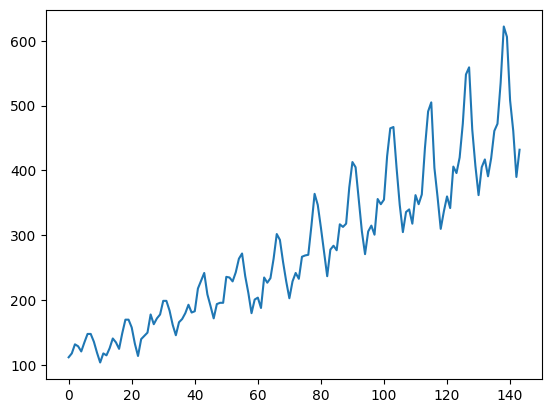

In [10]:
plt.plot(ap)
plt.show()

# 분산을 일정하게 만들기 - log transformation

In [13]:
ap_transf = np.log(ap)

In [14]:
ap_transf

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


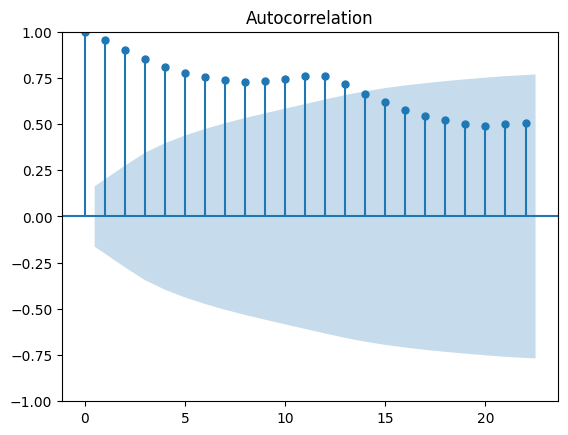

In [16]:
plot_acf(ap_transf) # acf plot, 점차 감소하는 모양새를 지니고 있음
plt.plot();

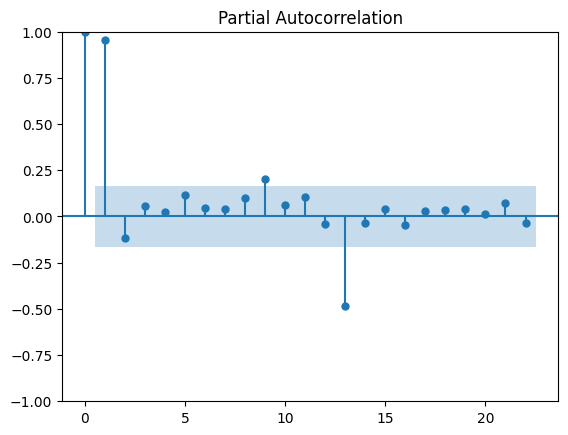

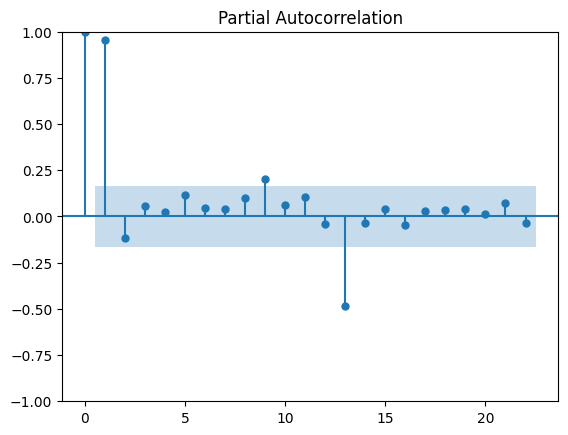

In [18]:
plot_pacf(ap_transf)

> 상단(첫 번째) 그래프
	•	lag 1, 2에서 강하게 유의미함 (막대가 신뢰구간을 벗어남, 1에 가까움)
	•	lag 3 이후로는 대부분 0에 가까움 (음영 구간 안에 들어옴)
	•	중간에 음의 값을 가지는 lag가 있으나 대부분은 0 근처에서 랜덤하게 분포

> 하단(두 번째) 그래프
	•	양상 거의 동일
(만약 차분 전/후라면, 차분 후에도 PACF 패턴이 비슷함을 의미)
	•	주요 유의미 lag는 1, 2
	•	이후 lag에서는 부분 자기상관이 거의 없음

# 차분을 통해 분석하기

In [22]:
ap_diff = ap_transf.diff()
ap_diff = ap_transf.dropna()

In [23]:
ap_diff

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


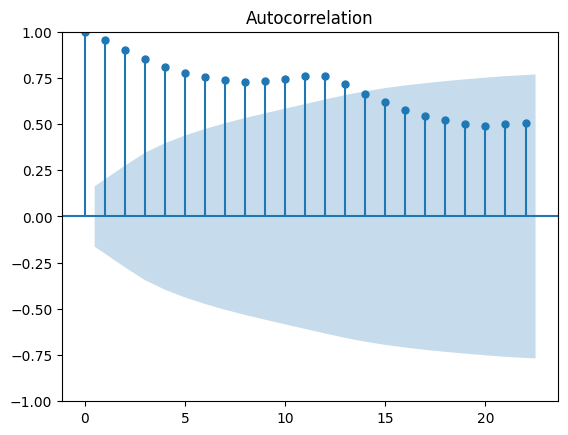

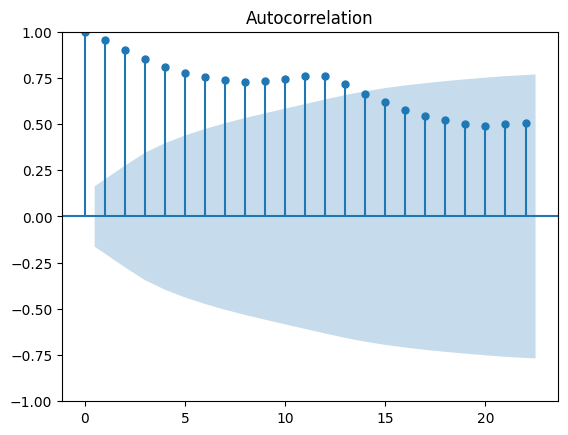

In [25]:
# lag 1과 lag 12에서 유의미한 lag가 포착됨
plot_acf(ap_diff)

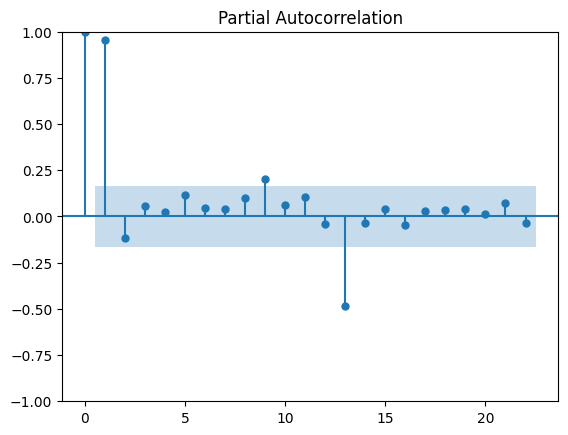

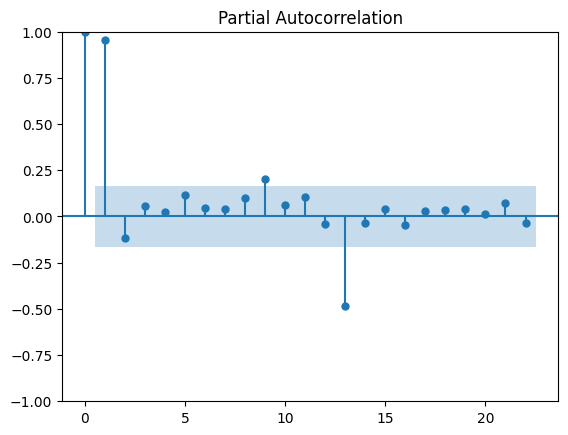

In [26]:
plot_pacf(ap_diff)

In [27]:
train_size = int(len(ap_transf)*0.8)

ap_transformed_train = ap_transf[:train_size]
ap_transformed_test = ap_transf[train_size:]

# Auto ARIMA 적용 및 결과 확인


In [28]:
# AutoARIMA
# seasonal = True, max_D(계절차분) = 12
model = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_D = 12) 
res = model.fit(ap_transformed_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-213.957, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.957, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-216.358, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-213.770, Time=0.25 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-219.394, Time=0.29 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-200.633, Time=0.15 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-218.513, Time=0.41 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-198.633, T

In [29]:
# confidence interval까지 도출
preds, conf_int = res.predict(n_periods=ap_transformed_test.shape[0], return_conf_int=True) 

# 아래의 코드 결과값을 서로 비교 분석해봅시다.
print(preds.shape) 
print(type(preds))
print('--'*40)
print(preds.shape[0])
print(type(preds.shape[0]))
# print('--'*40)
# print(preds)
# print('--'*40)
# print(conf_int)

(29,)
<class 'pandas.core.series.Series'>
--------------------------------------------------------------------------------
29
<class 'int'>


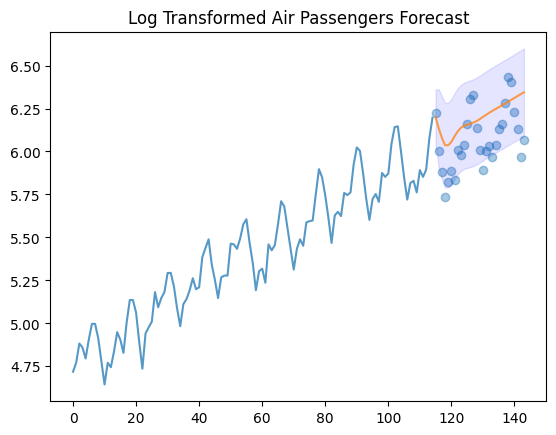

In [30]:
# 예측 성능을 시각화합니다. 
# 0. train과 test data를 축(axis)으로 만들었습니다.
# 1. x축은 test으로 만들어 놓은 train data를 사용하고, y축에 train data를 사용하여 train data를 시각화 합니다.
# 2. 1번 그래프에서 정답(AutoARIMA를 통해 만든 예측 값)에 해당하는 일자형 그래프가 생성됩니다.
# 3. 원래 가지고 있던 데이터셋의 y값(지도 학습의 정답)을 산점도(scatter plot)로 생성합니다.
# 4. 2, 3번의 분포에 해당하는 구간을 채워 그래프로 나타냈습니다.
x_axis = np.arange(ap_transformed_train.shape[0] + preds.shape[0]) # 115 + 29, plot을 그리기 위해 x축을 생성합니다. # 0
plt.plot(x_axis[:ap_transformed_train.shape[0]],ap_transformed_train, alpha=0.75) # 1
plt.plot(x_axis[ap_transformed_train.shape[0]:], preds, alpha=0.75) # 2
plt.scatter(x_axis[ap_transformed_train.shape[0]:],ap_transformed_test, 
            alpha=0.4, marker='o')  # 3 기존 test data는 scatter
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b') # 4
plt.title("Log Transformed Air Passengers Forecast") # plot의 제목
plt.show() # 4개의 plot을 시각화 합니다.

# ARCH 모델 실습해보기





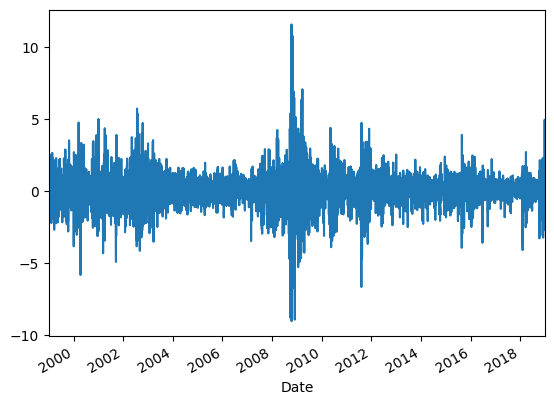

In [31]:
# ⑦-1 : 데이터 및 라이브러리 불러오기 
import datetime as dt # 날짜와 시간을 조작할 수 있는 Python 라이브러리 입니다 .
import arch.data.sp500 # S&P 500 데이터셋을 arch에서 불러옵니다.

# ⑦-2 : 필요한 데이터로 가공하고 시각화를 통해 확인하기
st = dt.datetime(2002, 1, 1) # start date
en = dt.datetime(2022, 1, 1) # end date
data = arch.data.sp500.load() # s&p 500 데이터 불러오기
market = data["Adj Close"] # 종가만 활용
returns = 100 * market.pct_change().dropna() # return값으로 변환
ax = returns.plot() # 수익률을 그래프로 만들기
xlim = ax.set_xlim(returns.index.min(), returns.index.max()) # xlim은 x축 값의 보기를 제한 합니다. 
plt.show()

In [32]:
# ⑦-3 : ARCH 모델 적용
from arch import arch_model

am = arch_model(returns) # return을 arch모델에 적합
res = am.fit(update_freq=5)

# ⑦-4 : 지표를 통한 결과 확인
print(res.summary())
# 다양한 결과가 제시되어있으나, 수업때 배웠던 p-value, AIC, BIC위주로 내용을 파악
# 아래에 있는 volatility model을 보면 alpha[1], Beta[1]은 GARCH(1,1)을 의미하며, p-value를 통해 신뢰도 95%에서 이들이 유의미함을 도출

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.282172935112
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477483884
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988963
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Mon, May 26 2025   Df Residuals:                     5029
Time:          

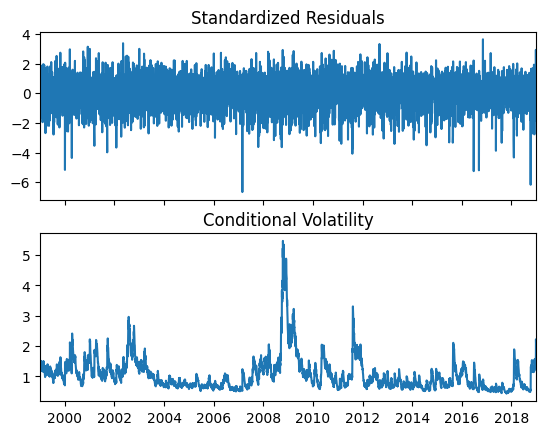

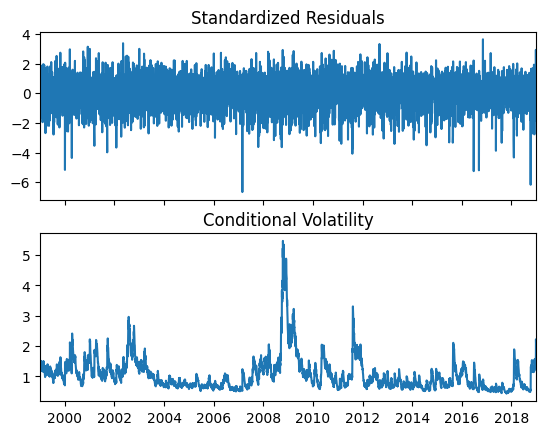

In [33]:
# ⑦-5 : 시각화를 통한 결과값 확인
res.plot()